EduHub has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

# About EduHub:

# Business Problem: 

This analysis will help EduHub in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

# Column Profiling:

•	Serial No. (Unique row ID)
•   GRE Scores (out of 340)
•   TOEFL Scores (out of 120)
•   University Rating (out of 5)
•   Statement of Purpose and Letter of Recommendation Strength (out of 5)
•   Undergraduate GPA (out of 10)
•   Research Experience (either 0 or 1)
•   Chance of Admit (ranging from 0 to 1)

# Importing Libraries:

In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from scipy import stats
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')
## Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)
import textwrap

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sns.set_style('darkgrid')

# Functions used in the case study

In [392]:
## Outlier detection function and box potting variables

def outlier_function(dataframe):
    for feature in dataframe.columns:
        if is_numeric_dtype(dataframe[feature]) == True:
            
            plt.rcParams["figure.figsize"] = (20,5)
            
            plt.subplot(121)
            
            Q3 = dataframe[feature].quantile(.75)
            Q1 = dataframe[feature].quantile(.25)
            IQR = Q3 - Q1
            max_value = Q3 + 1.5 * IQR
            min_value = Q1 - 1.5 * IQR

            min_value = 0 if min_value <= 0 else min_value

            values_over_max = dataframe[dataframe[feature] > max_value].count()[0]
            values_under_min = dataframe[dataframe[feature] < min_value].count()[0]

            sns.boxplot(x = feature, data = dataframe
                ,palette = "Set3",  showmeans = True,
                meanprops = {"marker" : "o", "markerfacecolor" : "white", "markersize" : "5", "markeredgecolor" : "black" })

            plt.title(feature + " box plot",fontsize = 18)
            
            ################
            
            plt.subplot(122)
            
            plt.title(feature + " dist plot",fontsize = 18)
            
            sns.distplot(dataframe[feature])
            

            plt.show()

            print(f"Mean is {round(np.mean(dataframe[feature]),0)} | Median is {round(np.median(dataframe[feature]),0)} ")
            print(f"# Outliers over upper limit ({round(max_value,0)}) are {values_over_max}")
            print(f"# Outliers under lower limit ({round(min_value,0)}) are {values_under_min}")
            print(" "*80)
            print("-"*80)
            print(" "*80)

In [393]:
## Univariate plotting and analysis function

def univariate_plots(dataframe):
    for feature in dataframe.columns[1:]:
        n = len(feature)
        if is_numeric_dtype(dataframe[feature]) == True:
            
            ## Freedman-Diaconis rule (for finding no of bins)
            Q3 = data[feature].quantile(.75)
            Q1 = data[feature].quantile(.25)
            IQR = Q3 - Q1
            max_value = max(data[feature])
            min_value = min(data[feature])
            
            bin_width = (2 * IQR) / (n** (1 / 3))
            bin_count = int(np.ceil((max_value - min_value) / bin_width))
            
            if bin_count < 10:
                ## Sturge’s rule (for finding no of bins)
                bin_count = int(np.ceil(np.log2(n)) + 1)
            
            if bin_count < 10: 
                ## 10 is default
                bin_count = 10
            
            sns.histplot(data = dataframe, x = feature, bins = bin_count ,kde = True)
            plt.title(f"Histplot of {feature}", fontsize = 18)
            plt.xlabel(feature,fontsize = 14)
            plt.ylabel(f"Count of {feature}",fontsize = 14)
            plt.xticks(fontsize = 12)
            plt.yticks(fontsize = 12)
            plt.show()
            print(" "*80)
            print(" "*7 + "-"*74)
            print(" "*80)
        else:
            m = data[feature].nunique()
            sns.countplot(x = feature, data = dataframe, palette = "Set2",order= data[feature].value_counts().index[0:m])
            ageb_txt = list(data[feature].value_counts())

            for idx,val in enumerate(ageb_txt):
                plt.text(idx,val+.1,str(val),fontsize=12,ha="center")
            
            plt.title(f"Countplot of {feature}", fontsize = 18)
            plt.xlabel(feature,fontsize = 14)
            plt.ylabel(f"Count of {feature}",fontsize = 14)
            plt.xticks(fontsize = 12)
            plt.yticks(fontsize = 12)
            plt.show()
            print(" "*80)
            print(" "*7 + "-"*74)
            print(" "*80)

In [394]:
## Color class for highlighting print statements

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [395]:
## Unique value function

def unique_count(dataframe):

    for feature in dataframe.columns:
        if dataframe[feature].nunique() <= 25:
            print(color.BOLD + color.BLUE + "Variable name: " + feature  + color.END)
            print(dataframe[feature].value_counts(normalize = True))
            print(" "*40)
            print("-"*40)
            print(" "*40)
        else:
            print(color.BOLD + color.BLUE + "Variable name: " + feature  + color.END)
            print(f"# unique values =  {dataframe[feature].nunique()}")
            print(f"Data type = {dataframe.dtypes[feature]}")
            print(" "*40)
            print("-"*40)
            print(" "*40)

In [396]:
## Basic description function

def basic_des(cs_name):
    print(color.BOLD + color.BLUE +  f'{cs_name} Shape is {data.shape}' + color.END)
    print()
    print("-" * 80)
    print()
    print(color.BOLD + color.BLUE +  f"{cs_name} Basic Information" + color.END)
    print()
    print(data.info())
    print()
    print("-" * 80)
    print()
    print(color.BOLD + color.BLUE + f"{cs_name} Null value count percentage:" + color.END)
    print()
    print(round(data.isnull().sum(axis=0) / len(data) * 100,2))
    print()
    print("-" * 80)
    print()
    print(color.BOLD + color.BLUE + f"{cs_name} Description:" + color.END)
    print()
    print(data.describe())
    print()
    print("-" * 80)
    print()
    print(color.BOLD + color.BLUE + f"{cs_name} Deep Description:" + color.END)
    print()
    print(data.describe().T)
    print()
    print("-" * 80)
    print()
    print(color.BOLD + color.BLUE + f"{cs_name} Duplicate values:" + color.END)
    print()
    print(data.loc[data.duplicated()])
    print(color.BOLD + color.BLUE + f"Number of duplicated values is/are: {data.duplicated().sum()}" + color.END)
    print()
    print("-" * 80)
    print()
    print(color.BOLD + color.BLUE + f"{cs_name} Number of unique values:" + color.END)
    print()
    print(data.nunique())
    print()
    print("-" * 80)


In [397]:
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

# Exploratory Data Analysis

## 1. Reading the data:

In [398]:
data = pd.read_csv("EduHub_Admission.csv")

## 2. Basic Statistics on preprocessed data

In [399]:
basic_des("EduHub case study -")

Jamboree case study - Shape is (500, 9)

--------------------------------------------------------------------------------

Jamboree case study - Basic Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None

--------------------------------------------------------------------------------

Jamboree case study - Null value count percentage:

Serial No.   

## 3. Unique value details

In [400]:
unique_count(data)

Variable name: Serial No.
# unique values =  500
Data type = int64
                                        
----------------------------------------
                                        
Variable name: GRE Score
# unique values =  49
Data type = int64
                                        
----------------------------------------
                                        
Variable name: TOEFL Score
# unique values =  29
Data type = int64
                                        
----------------------------------------
                                        
Variable name: University Rating
3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University Rating, dtype: float64
                                        
----------------------------------------
                                        
Variable name: SOP
4.0    0.178
3.5    0.176
3.0    0.160
2.5    0.128
4.5    0.126
2.0    0.086
5.0    0.084
1.5    0.050
1.0    0.012
Name: SOP, dtype: float64
                   

## 4. Dataset basic inspection

In [401]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [402]:
data.tail(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
490,491,307,105,2,2.5,4.5,8.12,1,0.67
491,492,297,99,4,3.0,3.5,7.81,0,0.54
492,493,298,101,4,2.5,4.5,7.69,1,0.53
493,494,300,95,2,3.0,1.5,8.22,1,0.62
494,495,301,99,3,2.5,2.0,8.45,1,0.68
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


# Data Preprocessing

## 1. Removing Serial Number column

In [403]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [404]:
data = data.drop('Serial No.',axis = 1)

## 2. Renaming Columns

In [405]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [406]:
data.rename(columns = {'LOR ':'LOR', 'Chance of Admit ':'Chance_of_Admit','GRE Score' : 'GRE_Score', 'TOEFL Score': 'TOEFL_Score', 'University Rating' : 'University_Rating' }, inplace = True)

In [407]:
data.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

## 3. Outlier detection

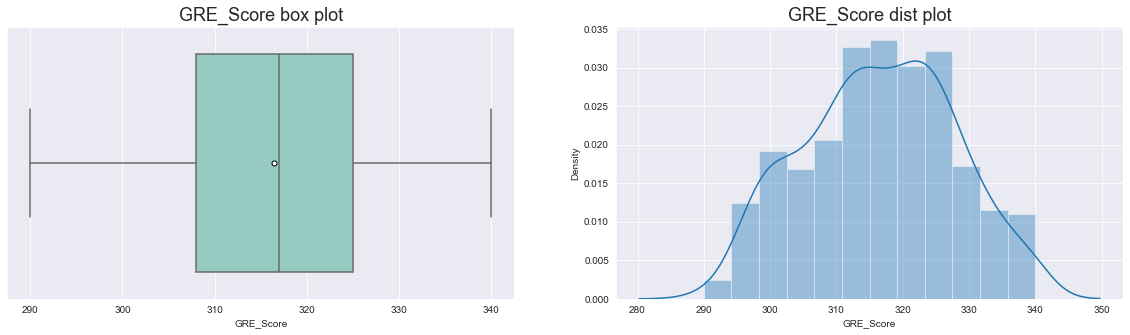

Mean is 316.0 | Median is 317.0 
# Outliers over upper limit (350.0) are 0
# Outliers under lower limit (282.0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


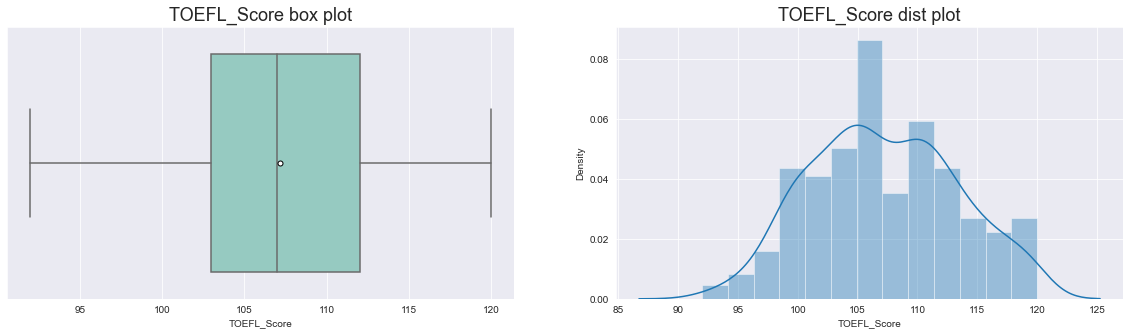

Mean is 107.0 | Median is 107.0 
# Outliers over upper limit (126.0) are 0
# Outliers under lower limit (90.0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


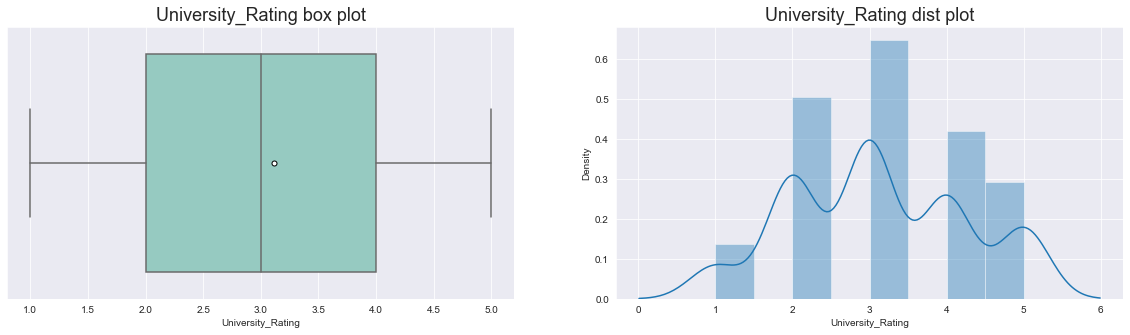

Mean is 3.0 | Median is 3.0 
# Outliers over upper limit (7.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


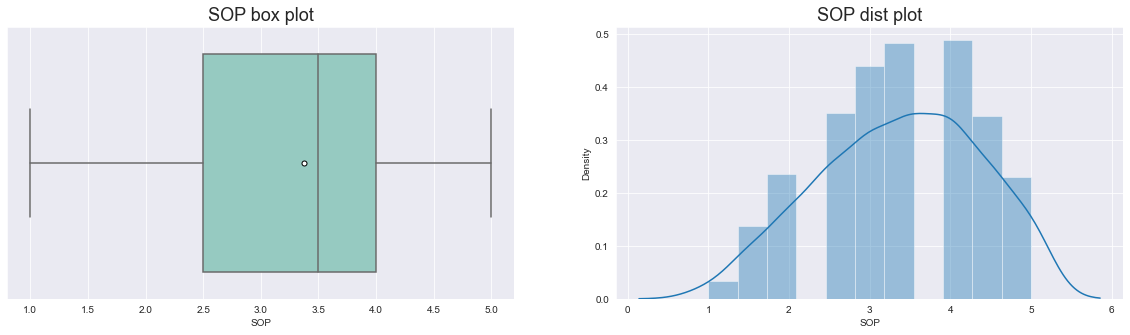

Mean is 3.0 | Median is 4.0 
# Outliers over upper limit (6.0) are 0
# Outliers under lower limit (0.0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


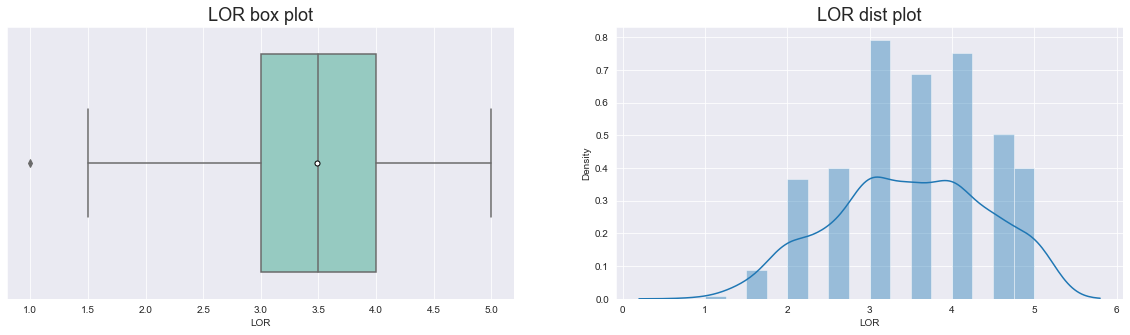

Mean is 3.0 | Median is 4.0 
# Outliers over upper limit (6.0) are 0
# Outliers under lower limit (2.0) are 1
                                                                                
--------------------------------------------------------------------------------
                                                                                


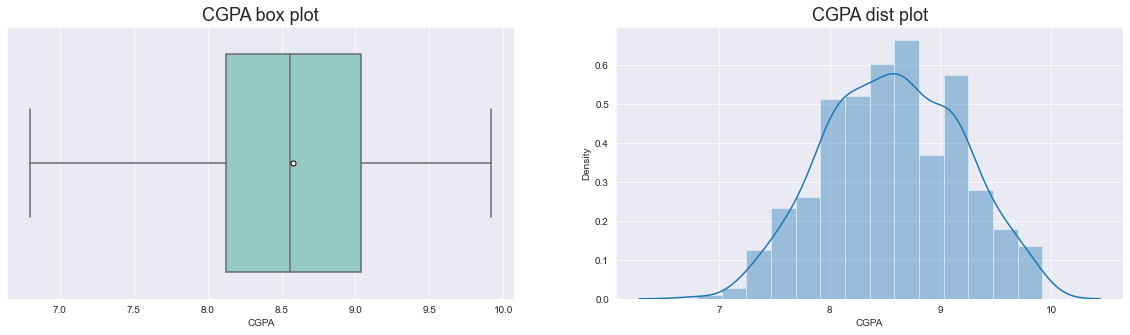

Mean is 9.0 | Median is 9.0 
# Outliers over upper limit (10.0) are 0
# Outliers under lower limit (7.0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


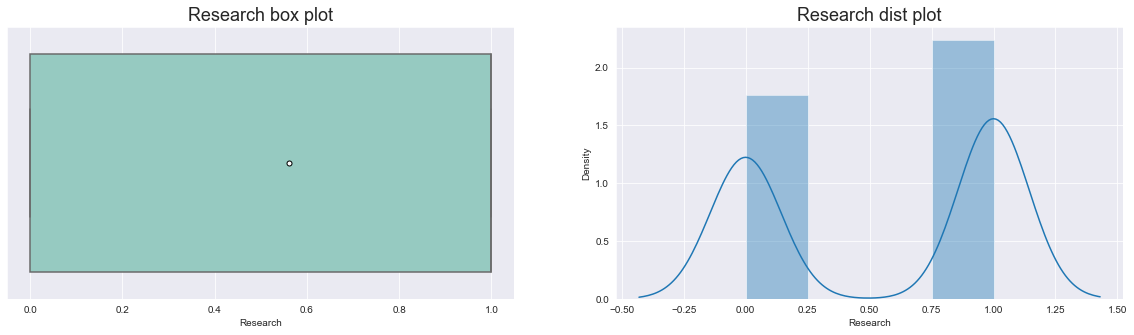

Mean is 1.0 | Median is 1.0 
# Outliers over upper limit (2.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


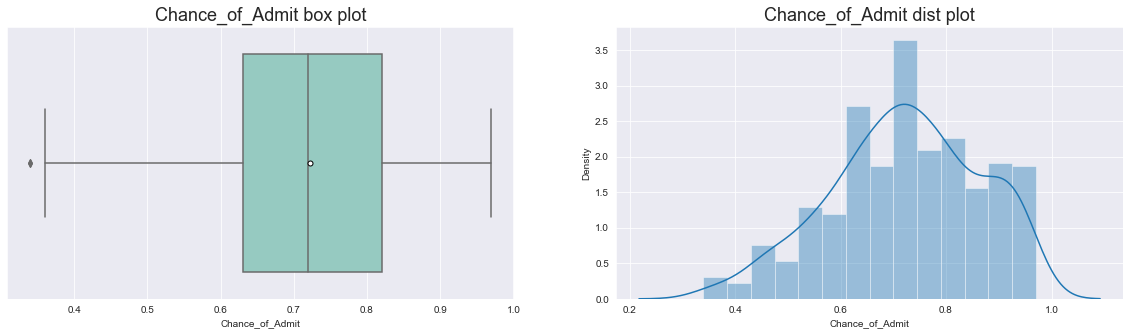

Mean is 1.0 | Median is 1.0 
# Outliers over upper limit (1.0) are 0
# Outliers under lower limit (0.0) are 2
                                                                                
--------------------------------------------------------------------------------
                                                                                


In [408]:
outlier_function(data)

## 4. Outlier Treatment

### 1. There are two outliers in 'Chance of Admit' at min end

In [409]:
feature_CA = 'Chance_of_Admit'
Q3_CA = data[feature_CA].quantile(.75)
Q1_CA = data[feature_CA].quantile(.25)
IQR_CA = Q3_CA - Q1_CA
max_value_CA = Q3_CA + 1.5 * IQR_CA
min_value_CA = Q1_CA - 1.5 * IQR_CA

print(max_value_CA,min_value_CA)

1.105 0.3450000000000001


In [410]:
## Substituting with the lower limit of the box plot
data['Chance_of_Admit'][data['Chance_of_Admit'] < min_value_CA ] = min_value_CA

### 2. There is one outliers in 'LOR' at min end

In [411]:
feature_LOR = 'LOR'
Q3_LOR = data[feature_LOR].quantile(.75)
Q1_LOR = data[feature_LOR].quantile(.25)
IQR_LOR = Q3_LOR - Q1_LOR
max_value_LOR = Q3_LOR + 1.5 * IQR_LOR
min_value_LOR = Q1_LOR - 1.5 * IQR_LOR

print(max_value_LOR,min_value_LOR)

5.5 1.5


In [412]:
## Substituting with the lower limit of the box plot
data['LOR'][data['LOR'] < min_value_LOR ] = min_value_LOR

## 5. Standardization of columns

In [413]:
data.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [414]:
from sklearn.preprocessing import MinMaxScaler

In [415]:
scaler = MinMaxScaler()
model=scaler.fit(data)
scaled_data=model.transform(data)
 
# print scaled features
print(scaled_data)

[[0.94       0.92857143 0.75       ... 0.91346154 1.         0.92      ]
 [0.68       0.53571429 0.75       ... 0.66346154 1.         0.664     ]
 [0.52       0.42857143 0.5        ... 0.38461538 1.         0.6       ]
 ...
 [0.8        1.         1.         ... 0.88461538 1.         0.936     ]
 [0.44       0.39285714 0.75       ... 0.5224359  0.         0.616     ]
 [0.74       0.75       0.75       ... 0.71794872 0.         0.792     ]]


In [416]:
data_norm = pd.DataFrame(scaled_data, columns=['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'])

In [417]:
data_norm.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,0.94,0.928571,0.75,0.875,0.857143,0.913462,1.0,0.920
1,0.68,0.535714,0.75,0.750,0.857143,0.663462,1.0,0.664
2,0.52,0.428571,0.50,0.500,0.571429,0.384615,1.0,0.600
3,0.64,0.642857,0.50,0.625,0.285714,0.599359,1.0,0.728
4,0.48,0.392857,0.25,0.250,0.428571,0.451923,0.0,0.488


# Model Building

## 1. Creating Independent and Dependent datasets

In [418]:
X = data_norm[data_norm.columns.drop('Chance_of_Admit')]
Y = data_norm['Chance_of_Admit']

In [419]:
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.857143,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.857143,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.571429,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.285714,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.428571,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.714286,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000000,0.522436,0.0


## 2. Creating Training and Testing datasets

In [421]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7 , random_state=100)

## 3. Perform Linear Regression : Using SKLearn

In [422]:
from sklearn.linear_model import LinearRegression

In [423]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [424]:
# fit the model to the training data
lm.fit(X_train,Y_train)

LinearRegression()

## 4. Model Evaluation

In [425]:
# print the intercept
print(lm.intercept_)

0.0021098683336367996


In [426]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
GRE_Score,0.089862
TOEFL_Score,0.157570
University_Rating,0.033356
SOP,0.004195
LOR,0.096455
CGPA,0.636586
Research,0.044151


### Comment:
   - TOEFL Score and CGPA are the most important features, followed by GRE Score and LOR
   - SOP & University Rating seems to be least important

## 5. Predictions

In [427]:
# Making predictions using the model
Y_pred = lm.predict(X_test)

## 6. Calculating Error Terms

In [428]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

In [429]:
print('Mean_Squared_Error : ' ,mse)
print('Route Mean Squared Error: ', rmse)
print('Mean_Absolute_Error : ' ,mae)
print('r_square_value : ',r_squared)

Mean_Squared_Error :  0.008710855352357785
Route Mean Squared Error:  0.09333196318709783
Mean_Absolute_Error :  0.07275986657657278
r_square_value :  0.8356840327239407


### Comment:
- Mean Squared Error, Route Mean Squared Error and Mean Absolute Error are close to zero
- Also R2 value is above 80%
- Model is performaning well

## 7. Performing Linear Regression using StatsModel

In [430]:
import statsmodels.api as sm
X_train_sm = X_train

#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#So you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)

# create a fitted model in one line
lm_1 = sm.OLS(Y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const                0.002110
GRE_Score            0.089862
TOEFL_Score          0.157570
University_Rating    0.033356
SOP                  0.004195
LOR                  0.096455
CGPA                 0.636586
Research             0.044151
dtype: float64

### Comment:
   - TOEFL Score and CGPA are the most important features, followed by GRE Score and LOR
   - SOP & University Rating seems to be least important

In [431]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     213.0
Date:                Tue, 03 Jan 2023   Prob (F-statistic):          1.42e-120
Time:                        23:51:27   Log-Likelihood:                 321.72
No. Observations:                 350   AIC:                            -627.4
Df Residuals:                     342   BIC:                            -596.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0021      0.01

### Comment
- University Rating and SOP are not statistically significant as P value is greater than 10%

## 8. Range of Y predicted should be between 0 and 1, as it is a probability

In [432]:
Y_pred.min(),Y_pred.max()

(0.11316506430639195, 1.0422504813255462)

In [433]:
Y_pred[Y_pred > 1]
## There are two rows where Y predicted is greater than 1

array([1.04225048, 1.03180832])

In [434]:
## Assigning Y predited as 1 to both the rows
Y_pred[Y_pred > 1] = 1

In [435]:
## Check
Y_pred.max()

1.0

## 9. Actual vs Predicted

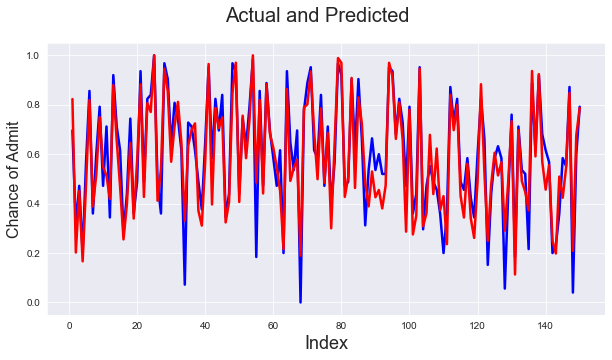

In [436]:
import matplotlib.pyplot as plt
c = [i for i in range(1,151,1)]         # generating index 
fig = plt.figure(figsize = (10,5))
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Chance of Admit', fontsize=16)                     # Y-label
plt.show()

### Comment:
- Actual and predicted values are almost overallping each other

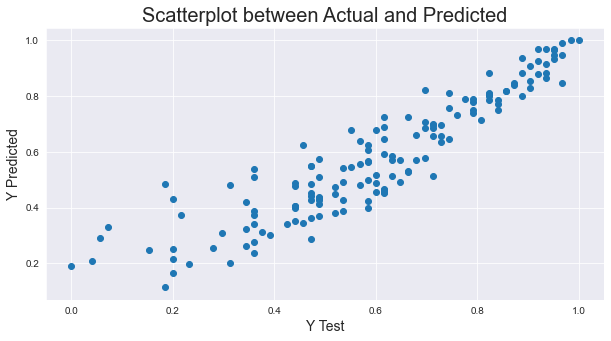

In [437]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.scatter(Y_test,Y_pred)
plt.title('Scatterplot between Actual and Predicted', fontsize=20)     
plt.xlabel('Y Test',fontsize=14)
plt.ylabel('Y Predicted',fontsize=14)
plt.show()

### Comment:
- Scatterplot of Actual and Predicted values shows that the model is a good fit

## 10. Model Refinement Using RFE

In [438]:
from sklearn.feature_selection import RFE

In [439]:
rfe = RFE(lm, 2)

In [440]:
rfe = rfe.fit(X_train, Y_train)

In [441]:
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True False]
[2 1 5 6 3 1 4]


In [442]:
X_train.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

### Comment:
- TOEFL Score and CGPA are the most important features, followed by GRE Score and LOR
- SOP & University Rating seems to be least important 

# Check Linear Regression Assumptions

## Assumption 1: Check for Multicollinearity

### A. Correlation Matrix

In [443]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

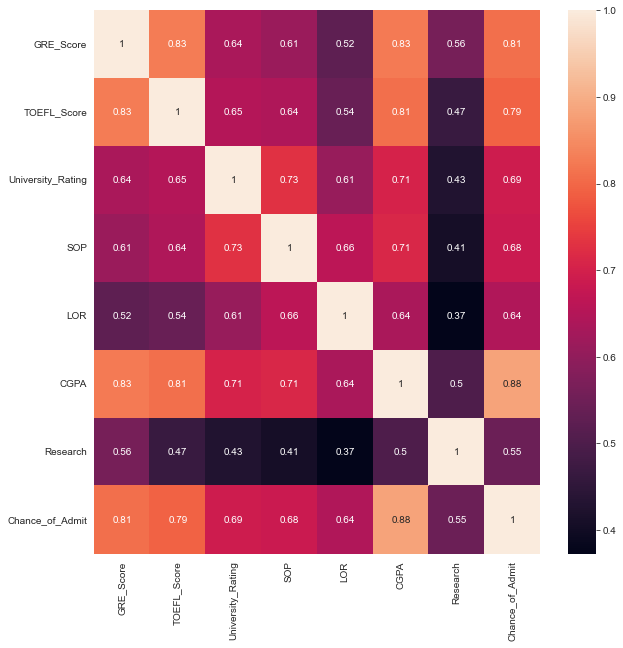

In [444]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot = True)
plt.show()

### Comment:
- Most of the features are highly correlated with each other, value above 0.4
- The data might have high multi correlation

### B. Calculation VIF for each independent variable

In [445]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,39.39
0,GRE_Score,29.00
1,TOEFL_Score,28.11
3,SOP,18.66
4,LOR,11.33
2,University_Rating,11.21
6,Research,3.35


## Comment
- VIF Score for almost all features is greater than 10
- High multicollenearity, Hence Linear Regression condition is not satisfied

## Assumption 2: Checking Mean of the residuals

In [446]:
error = Y_test - Y_pred
error_mean = np.mean(error)
print(error_mean)

0.019280878456061662


### Comment:
- Mean of the residuals is very close to zero, Linear Regression condition is satisfied

## Assumption 3: Linearity of Variables

### A. Visualise the relationship between the features and the response using scatterplots

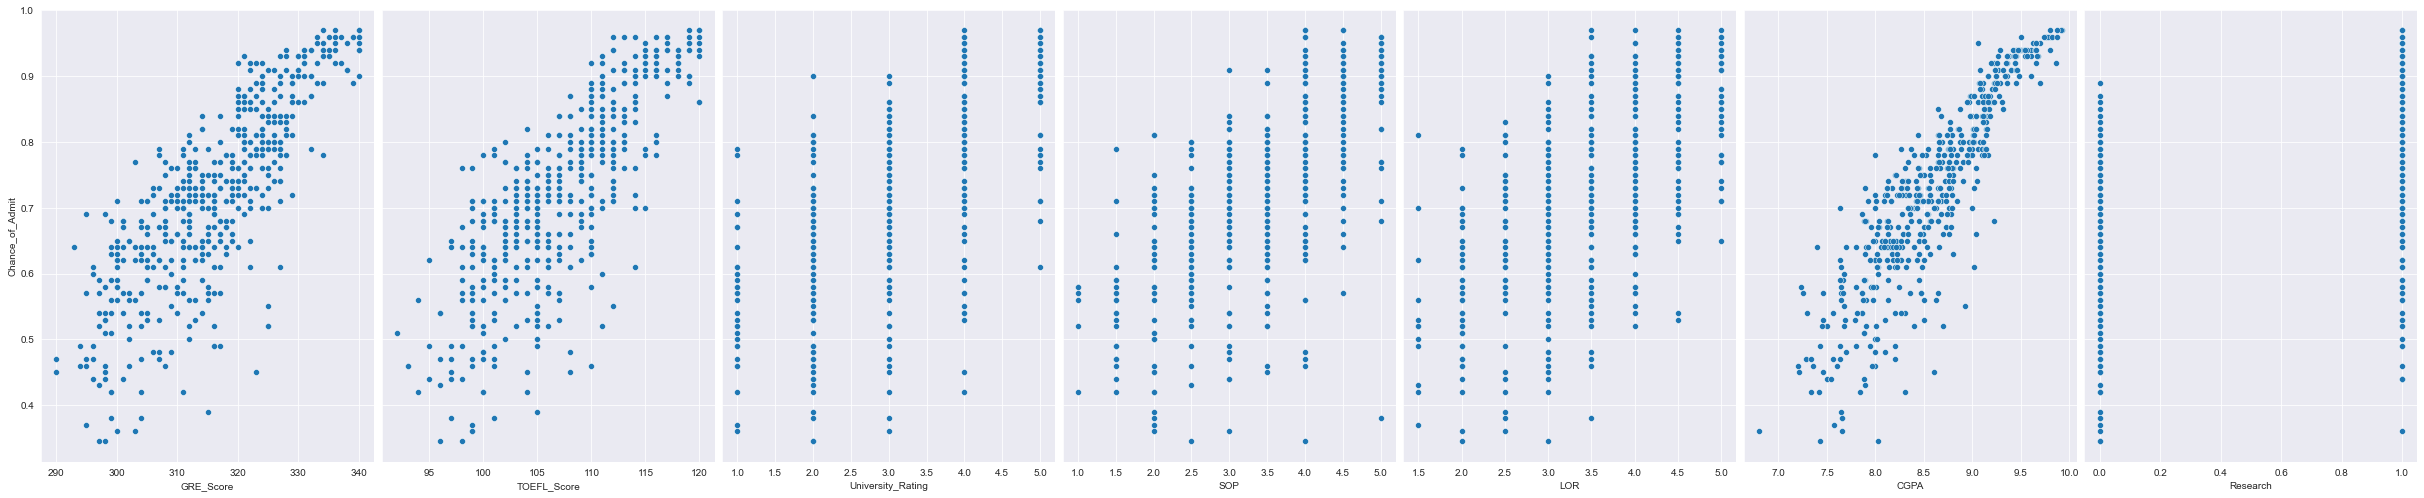

In [447]:
sns.pairplot(data, x_vars=['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research'], y_vars='Chance_of_Admit',size=7, aspect=0.7, kind='scatter')
plt.show()

### Comment
- GRE Score, TOEFL Score and CGPA have linear relationship with Chance of Admit
- University Rating, SOP, LOR & Rating are Ordinal variables
- Hence, Linear regression condition in satisfied

### B. Patten in the residual plot

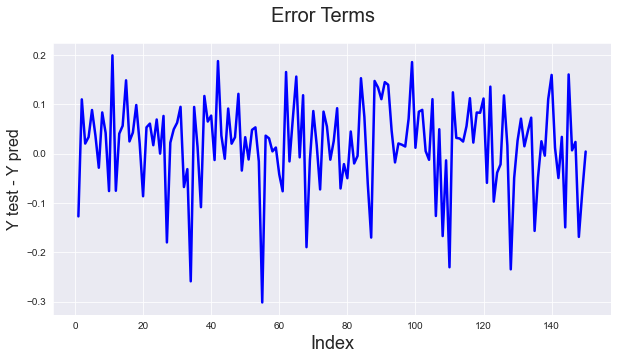

In [448]:
# Error terms
c = [i for i in range(1,151,1)]
fig = plt.figure(figsize = (10,5))
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Y test - Y pred', fontsize=16)   
plt.show()

### Comment:
- There is no pattern in the Residual plot and the residuals are almost equally above and below zero
- This condition is satisfied for Linear regression

## Assumption 4: Test for Homoscedasticity

### A. Checking for Pattern in Residuals and Y predicted

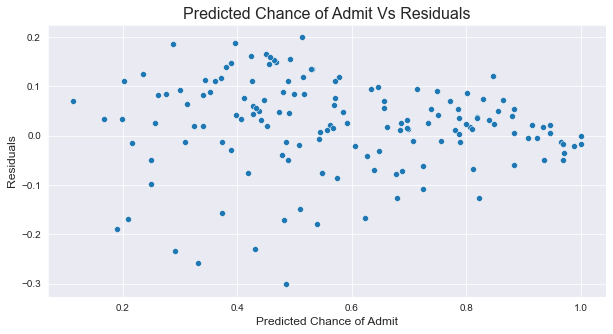

In [449]:
plt.figure(figsize = (10,5))
sns.scatterplot(Y_pred,error)
plt.title('Predicted Chance of Admit Vs Residuals', fontsize = 16)
plt.xlabel("Predicted Chance of Admit", fontsize = 12)
plt.ylabel("Residuals", fontsize = 12)
plt.show()

### Comment:
- No visible pattern among Residuals and Y predicted
- So this Linear regression condition is also satisfied

## B. Perform the Goldfeld-Quandt test

In [450]:
'''
Null (H0): Homoscedasticity is present.
Alternative (HA): Heteroscedasticity is present.
'''

'\nNull (H0): Homoscedasticity is present.\nAlternative (HA): Heteroscedasticity is present.\n'

In [451]:
sm.stats.diagnostic.het_goldfeldquandt(Y, X, drop=0.2)

(0.5147352553836683, 0.9999973458241705, 'increasing')

In [452]:
'''
Test Statistics: 0.5132115342511456
Corresponding P Value: 0.9999974417328211
'''

'\nTest Statistics: 0.5132115342511456\nCorresponding P Value: 0.9999974417328211\n'

### Comment:
- Since the p-value is not less than 0.05, we fail to reject the null hypothesis.
- We do not have sufficient evidence to say that heteroscedasticity is a problem in the regression model.
- This Linear Regression condition is also satisfied

## Assumption 5: Normality of residuals 

### A. Residual histogram

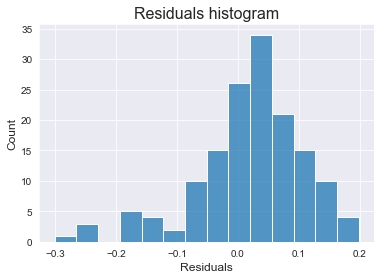

In [453]:
sns.histplot(error)
plt.title('Residuals histogram', fontsize = 16)
plt.xlabel("Residuals", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

### Comment:
- The graph looks gaussian and has peak around zero
- Hence, the Linear regression condition for normality of rasiduals is satisfied

### B. Q-Q plot for Residuals 

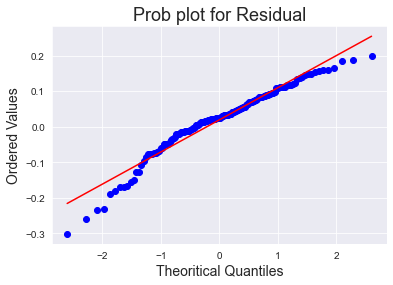

In [454]:
stats.probplot(error, dist = 'norm', plot = plt)
plt.title("Prob plot for Residual", fontsize = 18)
plt.xlabel("Theoritical Quantiles", fontsize = 14)
plt.ylabel("Ordered Values", fontsize = 14)
plt.show()

### Comment:
- QQ plot is almost on the line for most part
- This Linear regression condition is also satisfied

# Lasso & Ridge Regresion to tackle Multicollinerity

## A. Ridge Regression

In [455]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

In [456]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [457]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003609,0.000805,0.002640,0.000823,0.0001,{'alpha': 0.0001},-0.067513,-0.067825,-0.069673,-0.079721,-0.070877,-0.071122,0.004472,1,-0.069235,-0.068714,-0.069204,-0.065548,-0.068804,-0.068301,0.001392
1,0.003032,0.000064,0.001981,0.000039,0.001,{'alpha': 0.001},-0.067513,-0.067826,-0.069675,-0.079719,-0.070877,-0.071122,0.004471,2,-0.069235,-0.068714,-0.069205,-0.065549,-0.068805,-0.068302,0.001392
2,0.002800,0.000748,0.002207,0.000414,0.01,{'alpha': 0.01},-0.067514,-0.067832,-0.069693,-0.079703,-0.070879,-0.071124,0.004463,3,-0.069235,-0.068714,-0.069209,-0.065553,-0.068816,-0.068305,0.001391
3,0.002400,0.000490,0.002000,0.000001,0.05,{'alpha': 0.05},-0.067519,-0.067856,-0.069774,-0.079628,-0.070884,-0.071132,0.004424,4,-0.069237,-0.068715,-0.069249,-0.065585,-0.068861,-0.068329,0.001388
4,0.002799,0.000399,0.001799,0.000400,0.1,{'alpha': 0.1},-0.067526,-0.067957,-0.069872,-0.079536,-0.070889,-0.071156,0.004367,5,-0.069241,-0.068738,-0.069305,-0.065629,-0.068914,-0.068365,0.001384


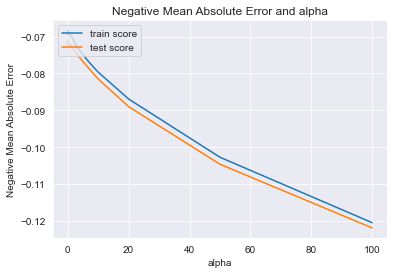

In [458]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [459]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
ridge.coef_

array([0.14915834, 0.14611135, 0.09455211, 0.08439013, 0.10613253,
       0.18869878, 0.06680387])

In [460]:
X_train.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

### Comments: Ridge Regression
- CGPA is most important feature, follwoed by GRE Score, TOEFL Score and LOR
- Research is least important, followed by University Rating and  SOP

## B. Lasso

In [461]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [462]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003411,0.000505,0.001988,0.000021,0.0001,{'alpha': 0.0001},-0.067587,-0.067630,-0.069656,-0.079280,-0.070773,-0.070985,0.004323,2,-0.069185,-0.068727,-0.069203,-0.065580,-0.068817,-0.068302,0.001374
1,0.002691,0.000592,0.001871,0.000203,0.001,{'alpha': 0.001},-0.068745,-0.068065,-0.069732,-0.077258,-0.069867,-0.070733,0.003329,1,-0.069165,-0.068684,-0.069301,-0.066038,-0.068991,-0.068436,0.001216
2,0.002571,0.000469,0.002011,0.000020,0.01,{'alpha': 0.01},-0.098379,-0.080492,-0.078353,-0.093798,-0.079761,-0.086157,0.008267,3,-0.084091,-0.082463,-0.084701,-0.081568,-0.084487,-0.083462,0.001230
3,0.002598,0.000489,0.001594,0.000498,0.05,{'alpha': 0.05},-0.218698,-0.146615,-0.160979,-0.177247,-0.171671,-0.175042,0.024199,4,-0.168900,-0.174168,-0.178229,-0.172219,-0.172837,-0.173270,0.003026
4,0.001983,0.000034,0.001425,0.000491,0.1,{'alpha': 0.1},-0.220527,-0.153543,-0.167829,-0.184229,-0.178449,-0.180915,0.022390,5,-0.170310,-0.187021,-0.183600,-0.179345,-0.180893,-0.180234,0.005605


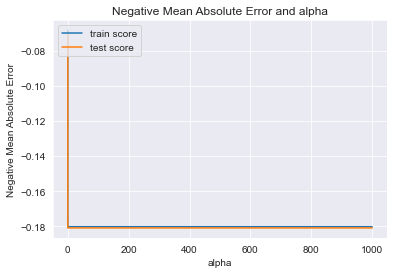

In [463]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [464]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, Y_train) 

Lasso(alpha=0.001)

In [465]:
lasso.coef_

array([0.08977919, 0.15121681, 0.03682001, 0.00113044, 0.09258779,
       0.61491033, 0.04557835])

In [466]:
X_train.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

### Comments: Lasso Regression
- CGPA is most important feature, follwoed by TOEFL Score, LOR and GRE Score
- SOP is least important, followed by University Rating and Research

# Insights:

'''
- GRE Score, TOEFL Score and CGPA have linear relationship with Chance of Admit (Dependent Variable)

- University Rating, SOP, LOR & Rating are Ordinal variables

- There are 3 outliers, 2 in Chance of Admit and 1 in LOR

- Based on Recursive Feature Elimination & Coeff. from Linear Regression Model we can say that
    - TOEFL Score and CGPA are the most important features, followed by GRE Score and LOR
    - SOP & University Rating are statistically insignificant criterias as Linear Regression P value is more than 10%, also     least important after ridge and lasso regression as well
      
- All the condition of Linear regression are satisfied, except Multicollinearity
    - Used Ridge and Lasso regression to decrease the impact of multicollinearity

- Model prediction are fairly good, both R2 and Adj R2 values above 81%


'''

# Recommendations

'''
- Linear Regression Condition for Multicollinearity is not satisfied, hence
    - We can try using advanced algorithms like Random Forest and Decision Trees
    - We can also try to get more data, as we only have 500 rows of data. This can enable EduHub make more reliable admission predictions and get favorable outcomes to boost business.  
    
- CGPA, TOEFL Score, GRE Score & LOR are important features for Admission. So EduHub should focus on boosting its GRE and TOEFL training teams with new innovation and ideas

- SOP and University Rating are relatively less important criteria for Admission. Hence, further investments in SOP writing and University research teams can be halted. 

'''